# 1. Getting Started

Julia is a general-purpose programming language that includes many powerful mathematical modelling packages.
We will use it primarily for modelling chemical reaction networks and symbolic computational algebra.

This notebook shows how to set up the Julia environment and basic syntax.

## Installation

You you will need to install the following:
- [Julia](https://julialang.org/install/)
- A program which can run Jupyter notebooks (such as [VSCode](https://code.visualstudio.com/download) or JupyterLab)
- Julia [extension for VSCode](https://marketplace.visualstudio.com/items?itemName=julialang.language-julia)
  
Optional:
- juliaup (see [here](https://julialang.org/install/)) to manage updates and multiple versions
- [Git](https://git-scm.com/) to download these tutorials from [GitHub](https://github.com/jedforrest/JuliaTutorials) directly


Tutorials can be downloaded directly from [GitHub](https://github.com/jedforrest/JuliaTutorials) or by running the following command:

`git clone https://github.com/jedforrest/JuliaTutorials.git`

### Adding packages
There are two ways to add packages in Julia: through the Julia REPL or within Julia itself.

#### Julia REPL

1. Run `julia` in any terminal to open the Julia REPL (Julia REPL begins with `julia>`).
2. Type `]` to enter "package mode". You should see something like `(@v1.11) pkg>`.
3. Optional: Run `activate .` to create a package environment in the current directory (this is similar to Python's venv).
4. Run `add Catalyst` to install Catalyst.jl (and all required dependicies)
5. Press backspace to exit package mode

Two other environments worth knowing about:
- `?` for help
- `;` for shell

#### Adding packages within Julia
These are the packages we will need to install to get started

In [ ]:
using Pkg
Pkg.activate(".")
Pkg.add("Catalyst")
Pkg.add("Plots")
Pkg.add("Latexify")
Pkg.add("OrdinaryDiffEq")

## Basic usage

Julia's syntax is based on similar modern languages such as MATLAB, R, and Python.

In [40]:
x = 1:2:100
sum(x.^2)

166650

In [41]:
# Functions
function myfunc(input)
    output = input^3
    output  # the last line of a function is returned
end

println(myfunc(555))

# inline functions
f(x) = 3x^2 + 2x + 1
g(y) = 1 / (1 - y)

g(f(2))

170953875


-0.0625

In [42]:
# Arrays
v = [1.0, 3, 5//9]  # Vector
M = [
    1 2 3  
    4 5 6
    7 8 9
]  # Matrix

x = M * v
println(x)
println(x[1])  # Arrays are 1-indexed

# operations and functions can be broadcast elementwise over collections
y = v .+ 20
println(y)

theta = 0:(pi/4):2pi
z = sin.(theta) # note the '.' before the '('
println(z)

[8.666666666666666, 22.333333333333332, 36.0]
8.666666666666666
[21.0, 23.0, 20.555555555555557]
[0.0, 0.7071067811865475, 1.0, 0.7071067811865476, 1.2246467991473532e-16, -0.7071067811865475, -1.0, -0.7071067811865477, -2.4492935982947064e-16]


In [51]:
using LinearAlgebra  # "Core" packages don't need to be downloaded

A = rand(3, 3)

3×3 Matrix{Float64}:
 0.647388  0.370547  0.112494
 0.134241  0.962395  0.799156
 0.123201  0.598823  0.161949

In [53]:
detA = det(A)
eigA = eigvals(A)

println(detA)
println(eigA)

-0.1847765613226354
[-0.23024248080552198, 0.5543941587685828, 1.447580682097242]


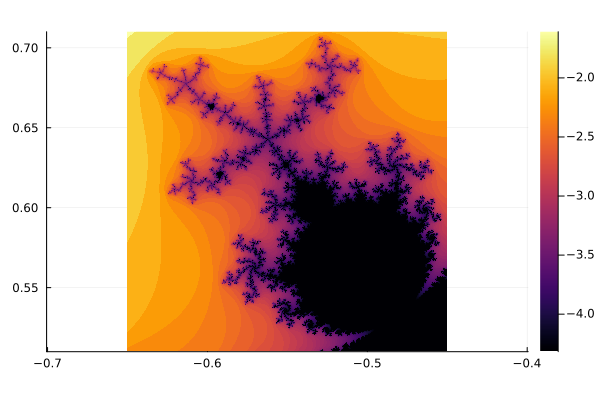

In [54]:
# Plotting
# Credit: https://discourse.julialang.org/t/seven-lines-of-julia-examples-sought/50416/10
using Plots
function mandelbrot(z) w = z
    for n in 1:74
        abs2(w) < 4 ? w = w^2 + z : return n
    end; 75
end
x, y = range(-0.65, -0.45; length=1600), range(0.51, 0.71; length=1600)
heatmap(x, y, -log.(mandelbrot.(x' .+ y .* im)); aspect_ratio=1)

Most functions have documentation included which can be accessed with the `@doc` macro e.g. `@doc abs`

In [55]:
@doc tr

```
tr(M)
```

Matrix trace. Sums the diagonal elements of `M`.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Matrix{Int64}:
 1  2
 3  4

julia> tr(A)
5
```
